## Table of Contents

- Importing Libraries
- Importing Dataframes
- Exploring Dataframes
- Exploring Relationships
1. Correlations
2. Scatterplots
3. Pair Plots
4. Categorical Plots
- Exporting Dataframes

## Importing Libraries

In [36]:
# Import libraries
import pandas as pd
from pandas import Grouper
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [37]:
# Checking matplotlib version
matplotlib.__version__

'3.7.1'

This version of matplotlib is suitable for visualizations

In [38]:
%matplotlib inline
import re
import calendar

## Importing Dataframes

In [39]:
# Define path
path = r'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [40]:
path

'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [41]:
# Importing dataframe using os path
df_gun = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_gun_violence_data.pkl'))

## Exploring Dataframes

In [42]:
# Finding the names of columns in the dataframe
df_gun.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [43]:
df_gun.shape

(239351, 22)

In [44]:
df_gun.head(20)

,incident_id,date,state,city_or_county,address,number_killed,number_injured,congressional_district,gun_stolen,gun_type,...,location_description,longitude,number_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,NaN,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,NaN,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,1.0,NaN,NaN,...,Fairmont Terrace,-95.9768,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,NaN,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,2.0,NaN,NaN,...,NaN,-90.0836,NaN,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,9.0,NaN,NaN,...,NaN,-121.7180,NaN,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,7.0,NaN,NaN,...,NaN,-76.6412,NaN,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,44.0


In [45]:
df_gun.describe()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
count,239351.000000,239351.000000,227411.000000,231432.000000,231432.000000,140073.000000,200617.000000,207039.000000
mean,0.252466,0.493848,8.000554,37.546385,-89.338708,1.372527,55.451392,20.478832
std,0.521948,0.729894,8.480943,5.131248,14.363537,4.680336,42.052124,14.203439
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,33.903250,-94.160350,1.000000,21.000000,9.000000
50%,0.000000,0.000000,5.000000,38.570100,-86.247850,1.000000,47.000000,19.000000
75%,0.000000,1.000000,10.000000,41.435400,-80.045700,1.000000,84.000000,30.000000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.000000


## Exploring Relationships

### Correlations:

In [46]:
# First, create a subset containing the relevant columns
df_gun_1 = df_gun[['number_killed', 'number_injured', 'congressional_district', 'latitude', 'longitude', 'number_guns_involved', 'state_house_district', 'state_senate_district']]

In [47]:
# Checking results
df_gun_1

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
0,0,4,14.0,40.3467,-79.8559,NaN,NaN,NaN
1,1,3,43.0,33.9090,-118.3330,NaN,62.0,35.0
2,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,4,0,6.0,39.6518,-104.8020,NaN,40.0,28.0
4,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0
...,...,...,...,...,...,...,...,...
239672,0,0,NaN,NaN,NaN,1.0,NaN,NaN
239673,1,0,4.0,31.7537,-93.0836,1.0,23.0,31.0
239674,0,1,2.0,29.9239,-90.0442,1.0,85.0,7.0
239675,1,0,9.0,29.7201,-95.6110,1.0,149.0,17.0


In [48]:
# Creating a correlation matrix to identify the relationship between variables
df_gun_1.corr()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
number_killed,1.000000,-0.125331,0.055567,-0.079994,-0.062112,-0.028195,-0.006110,-0.010730
number_injured,-0.125331,1.000000,-0.007589,-0.011437,0.036879,-0.038824,-0.030340,-0.044213
congressional_district,0.055567,-0.007589,1.000000,-0.259422,-0.215574,0.021275,0.228720,0.309223
latitude,-0.079994,-0.011437,-0.259422,1.000000,-0.057034,-0.001383,-0.237893,0.028524
longitude,-0.062112,0.036879,-0.215574,-0.057034,1.000000,-0.016115,0.236531,0.113436
number_guns_involved,-0.028195,-0.038824,0.021275,-0.001383,-0.016115,1.000000,-0.003277,0.004292
state_house_district,-0.006110,-0.030340,0.228720,-0.237893,0.236531,-0.003277,1.000000,0.431181
state_senate_district,-0.010730,-0.044213,0.309223,0.028524,0.113436,0.004292,0.431181,1.000000


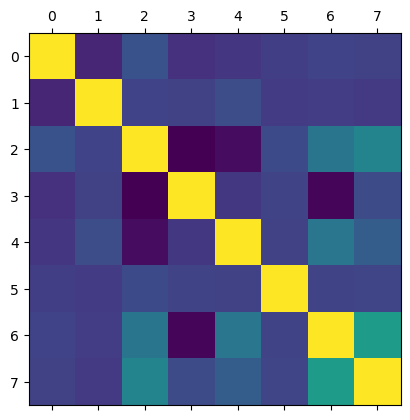

In [49]:
# Creating a correlation heatmap using matplotlib

plt.matshow(df_gun_1.corr())
plt.show()

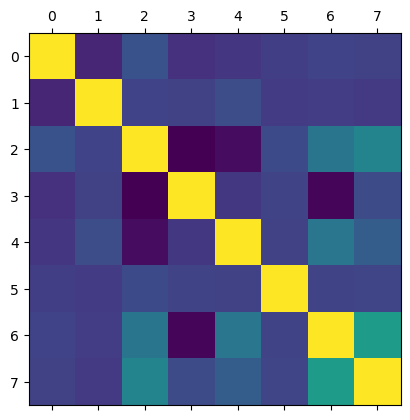

In [50]:
# Saving visualization as a png file
plt.matshow(df_gun_1.corr())
plt.savefig("corr1.png") 

# This will save the image in the working directory.

In [51]:
#current dir
cwd = os.getcwd()
cwd

'/Users/isaacotubanjo/Documents/US Gun Violence Analysis/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

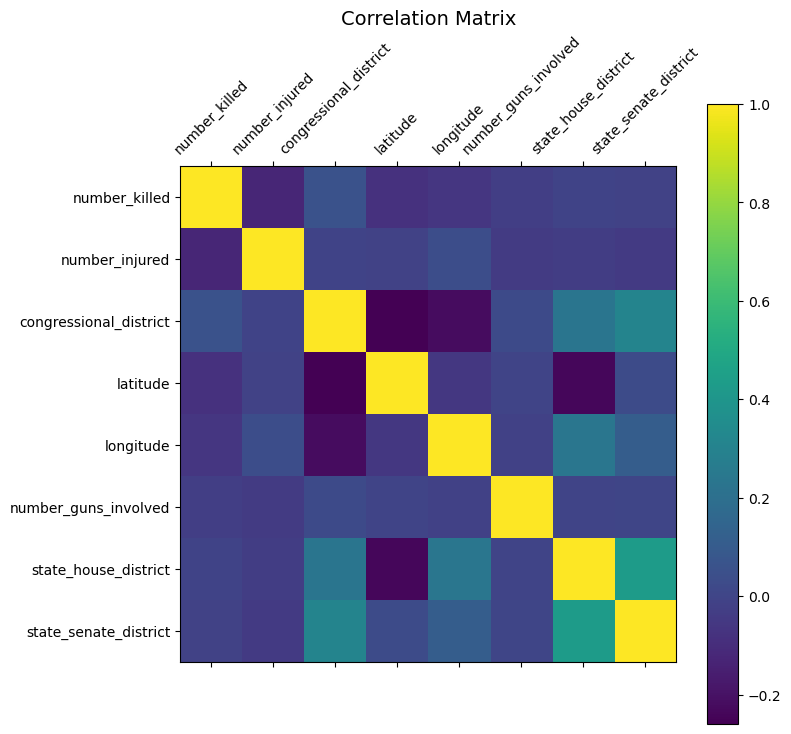

In [52]:
# Adding labels, legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_gun_1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_gun_1.shape[1]), df_gun_1.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_gun_1.shape[1]), df_gun_1.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Creating a correlation matrix heatmap (colored)

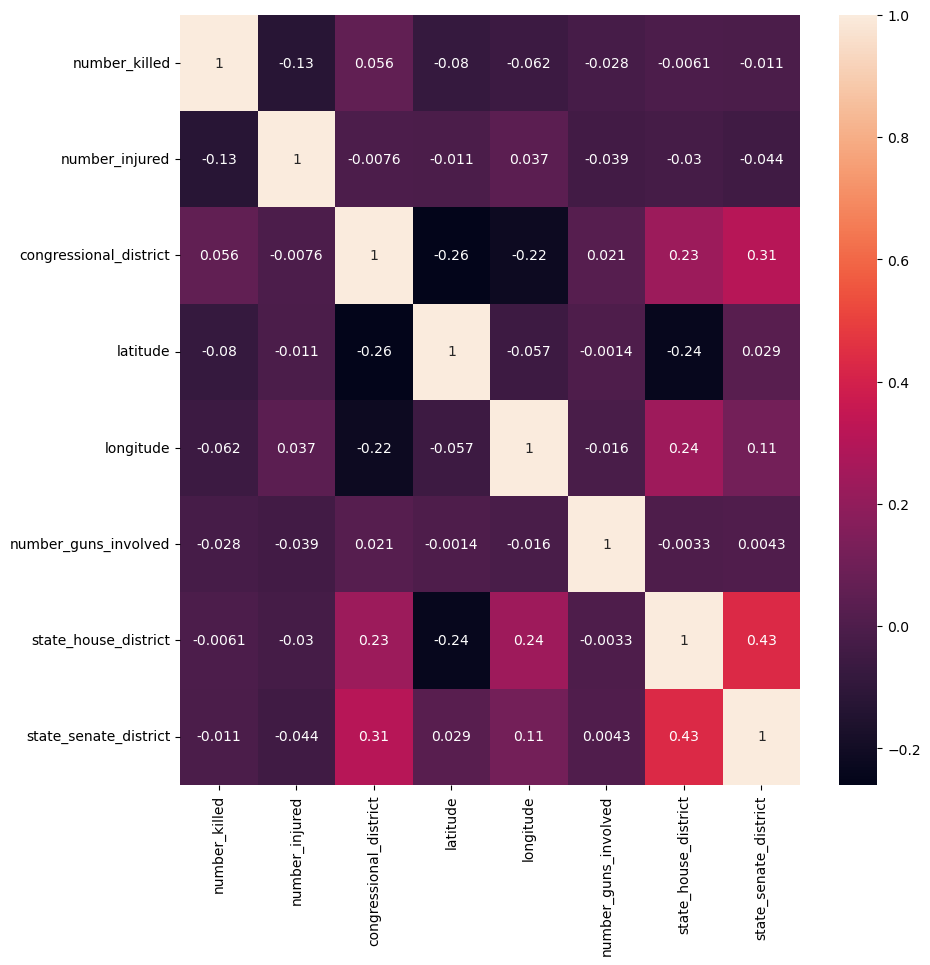

In [53]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
plot_1 = sns.heatmap(df_gun_1.corr(), annot = True, ax = ax) 

In [54]:
# Exporting visualization
plot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_heatmap.png'))

There are no strong correlations between these variables. The strongest correlation which is a moderate relationship is between state_house_district and state_senate_district which may be because they are variations of the same type of data.

### Scatterplots:

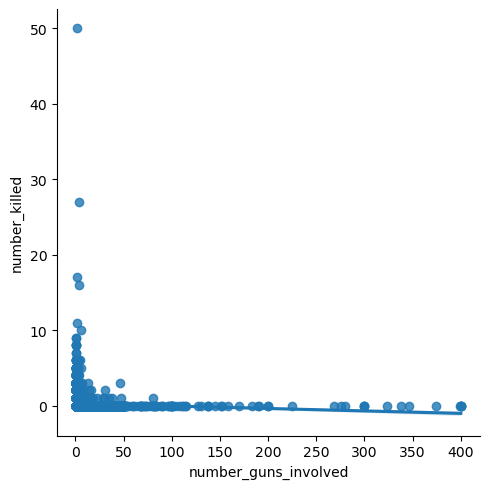

In [55]:
# Create a scatterplot for the "number_guns_involved" and "number_killed" columns in seaborn

sns.lmplot(x = 'number_guns_involved', y = 'number_killed', data = df_gun_1)

The scatterplot looks skewed due to the presence of outliers in the guns involved column. To correct this, we might need to remove the higher numbers in that column. From the scatterplot, we can see that there are only few points once the number_guns_involved is higher than 50. I believe it might be more realistic to use 10 as the max value.

In [56]:
# To check for outliers in the data due to the position of the points
df_gun_1.loc[df_gun_1['number_guns_involved'] > 10]
# This will return number_guns_involved higher than 10

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
7607,0,0,4.0,30.4431,-88.9161,25.0,115.0,50.0
9022,0,0,5.0,34.9161,-87.5319,30.0,1.0,1.0
15077,0,0,1.0,47.8445,-122.2060,46.0,44.0,44.0
15153,0,0,12.0,40.7495,-73.9893,151.0,75.0,27.0
16317,0,0,NaN,NaN,NaN,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...
238132,0,0,23.0,42.0169,-77.8960,18.0,148.0,57.0
238154,0,0,16.0,40.3303,-75.9292,21.0,127.0,11.0
238676,0,0,NaN,NaN,NaN,12.0,NaN,NaN
238896,0,0,NaN,NaN,NaN,25.0,NaN,NaN


In [57]:
# Replacing all rows with values higher than 10 with missing values
df_gun_1.loc[df_gun_1['number_guns_involved'] > 10, 'number_guns_involved'] = np.nan

In [58]:
# Checking results
df_gun_1['number_guns_involved'].max()

10.0

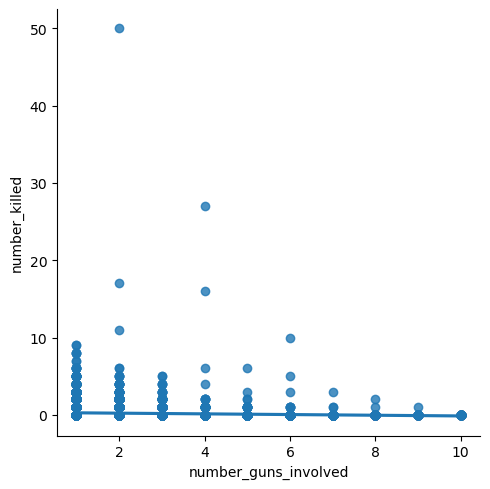

In [60]:
# Recreating the scatterplot without the outliers
plot_2 = sns.lmplot(x = 'number_guns_involved', y = 'number_killed', data = df_gun_1)

There doesn't seem to be a significant relationship in any direction between both variables

In [61]:
# Exporting visualization
plot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_1.png'))

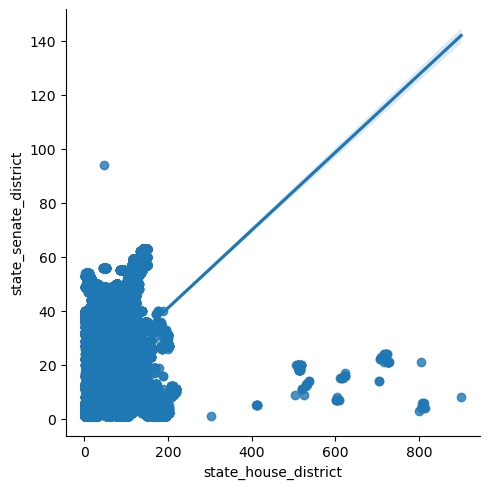

In [62]:
# Using the variables with the strongest correlation:
# Create a scatterplot for the "state_house_district" and "state_senate_district" columns in seaborn

plot_3 = sns.lmplot(x = 'state_house_district', y = 'state_senate_district', data = df_gun_1)

There seems to be a strong relationship at the outset but the relationship gets weaker as the values increase. There are some outliers on the state_house_district axis but only one outlier on the state_senate_district axis. 

In [63]:
# Exporting visualization
plot_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_2.png'))

### Pair Plots:

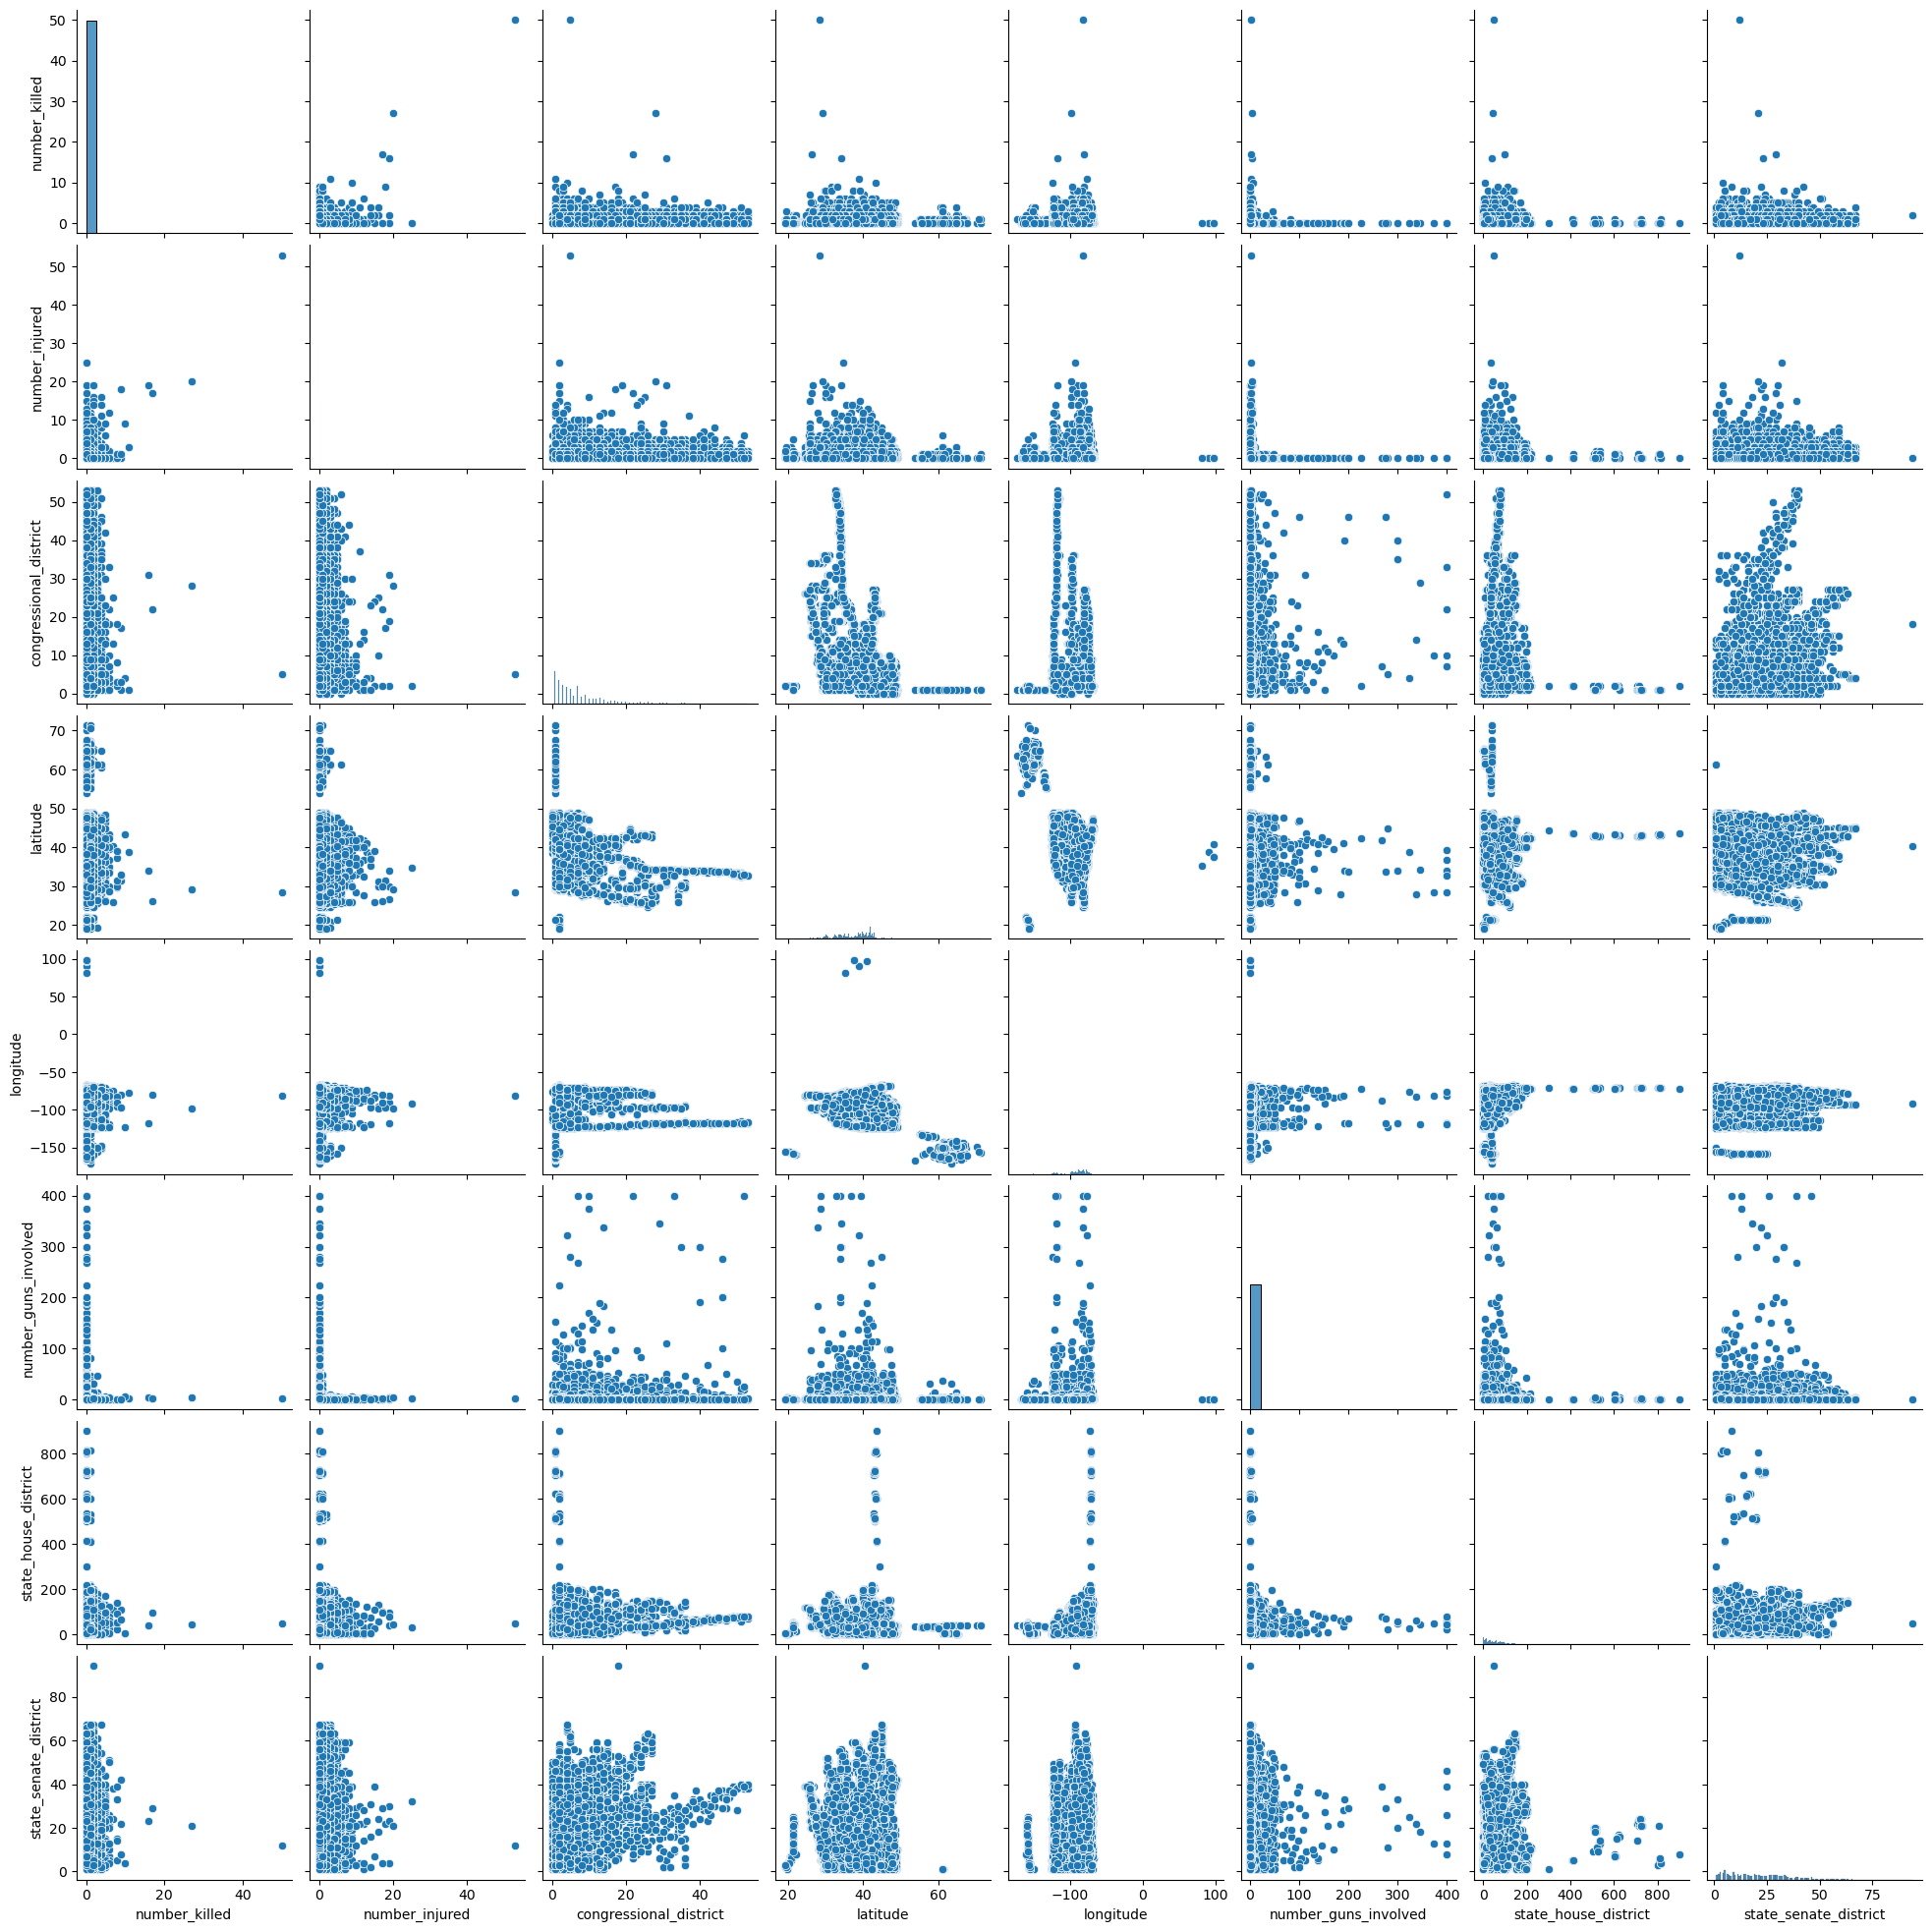

In [64]:
# Creating pair plots for the entire dataframe:
plot_4 = sns.pairplot(df_gun)

Based on the pair plots, the relationships between these variables are still not very strong at first glance. There might be more insights gained if the variables are tested using other plots or visualizations. It is however evident that there are a few outliers in a few of the columns (number_killed is an example).

In [88]:
# Exporting visualization
plot_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

### Categorical Plots:

#### Creating a categorical variable that splits the 'number_guns_involved' into categories

<Axes: xlabel='state_senate_district', ylabel='Count'>

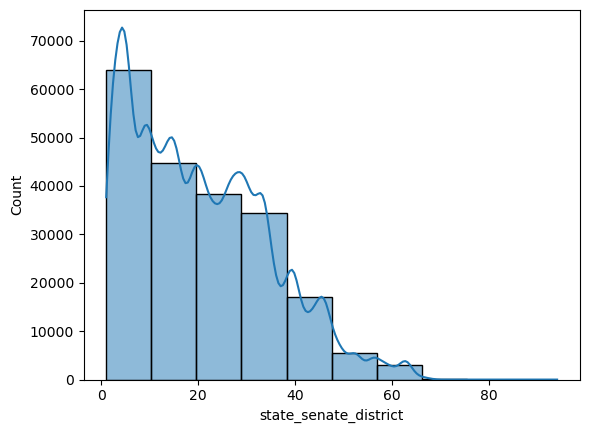

In [75]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_gun['state_senate_district'], bins = 10, kde = True)

In [77]:
df_gun.loc[df_gun['state_senate_district'] < 20, 'senate_category'] = 'Low representation'

In [79]:
df_gun.loc[(df_gun['state_senate_district'] >= 20) & (df_gun['state_senate_district'] < 40), 'senate_category'] = 'Medium representation'

In [80]:
df_gun.loc[df_gun['state_senate_district'] >= 40, 'senate_category'] = 'High representation'

In [81]:
df_gun['senate_category'].value_counts(dropna = False)

Low representation       108691
Medium representation     75724
NaN                       32312
High representation       22624
Name: senate_category, dtype: int64

#### Combining the senatorial representation with the number of deaths

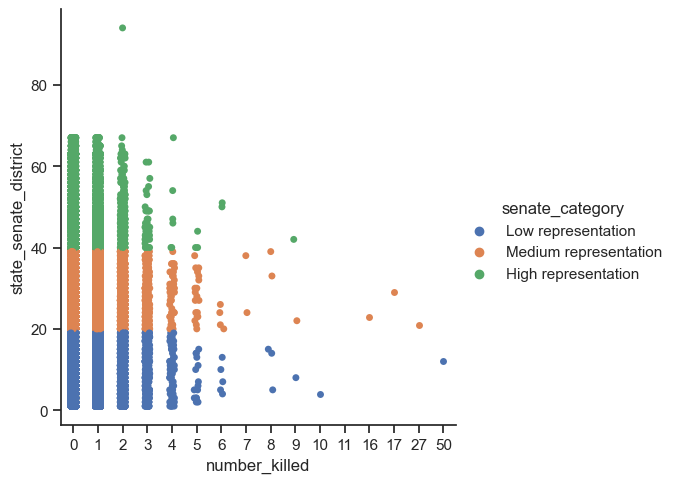

In [87]:
# Creating categorical plot in seaborn using the senate_category which shows the senatorial representation of all the states in the US
sns.set(style="ticks")
plot_5 = sns.catplot(x="number_killed", y="state_senate_district", hue="senate_category", data=df_gun)

There doesn't seem to be a clear distinction here. Looking at the chart, we can see that the numbers killed are generally low in all areas (low, medium and high representation). This further proves that there seems to be no relaitonship between the level of senate representation and the number of people killed in any areas.

In [89]:
# Exporting visualization
plot_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'categorical_plot.png'))

#### -	Is there a relationship between the senate representation and the frequency of incidents?

There doesn't seem to be a significant relationship between the number of people killed and the level of senate representation.

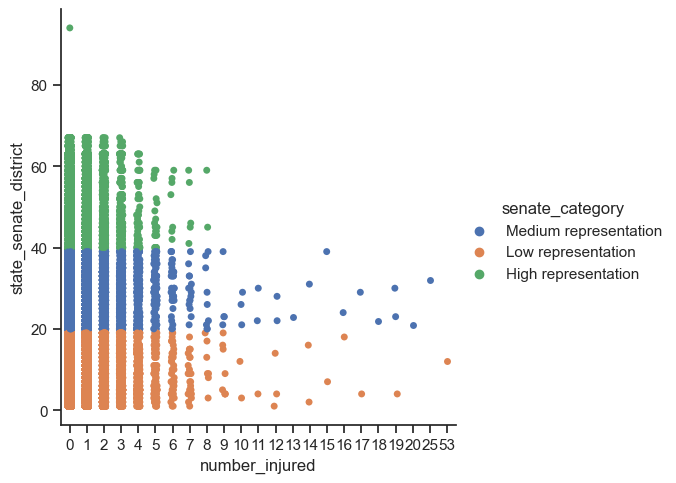

In [93]:
# Creating categorical plot in seaborn using the senate_category which shows the senatorial representation of all the states in the US
sns.set(style="ticks")
plot_6 = sns.catplot(x="number_injured", y="state_senate_district", hue="senate_category", data=df_gun)

In [94]:
# Exporting visualization
plot_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'categorical_plot_2.png'))

The pattern here is almost identical to the previous visualization. There is also no significant relationship between people that have been injured and the level of senate representation